In [171]:
# Capstone project using Google Home Solar panel information from Kaggle
# https://www.kaggle.com/jboysen/google-project-sunroof
# Project goal is to test various correlations between characteristics of a state and 
# how many total solar installations it has.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [172]:
# Data set for current solar panel installation, by state
solar = pd.read_csv('Files/solarstate.csv')
solar

,region_name,state_name,lat_max,lat_min,lng_max,lng_min,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,count_qualified,...,yearly_sunlight_kwh_n,yearly_sunlight_kwh_s,yearly_sunlight_kwh_e,yearly_sunlight_kwh_w,yearly_sunlight_kwh_f,yearly_sunlight_kwh_median,yearly_sunlight_kwh_total,install_size_kw_buckets_json,carbon_offset_metric_tons,existing_installs_count
0,NaN,NaN,32.651912,32.542257,-115.667998,-117.030077,32.574314,-116.634551,1300.358333,2,...,4.745559e+03,7.692078e+03,0.000000e+00,0.000000e+00,0.000000e+00,5209.464685,1.243764e+04,"[[0,2]]",0.000000e+00,0
1,Alabama,Alabama,34.991768,30.187614,-84.957065,-88.412099,32.940784,-86.850699,1083.961668,700683,...,1.128360e+09,3.874097e+09,2.420185e+09,2.801916e+09,8.736817e+09,12069.322656,1.896138e+10,"[[0,137667],[5,221548],[10,148580],[15,74864],...",1.202295e+07,549
2,Alaska,Alaska,71.335131,51.851636,-131.520140,-176.657408,61.374116,-148.508058,799.534984,27583,...,2.186594e+06,1.119332e+08,4.490719e+07,4.491908e+07,2.625466e+08,6540.612622,4.664927e+08,"[[0,7503],[5,10425],[10,4409],[15,1538],[20,84...",1.921975e+05,83
3,Arizona,Arizona,36.999901,31.332926,-109.045425,-114.791451,33.345498,-111.894876,1378.221736,1638999,...,1.780583e+09,1.085184e+10,6.054637e+09,8.640896e+09,1.906534e+10,18974.796637,4.639329e+10,"[[0,199346],[5,449953],[10,417070],[15,259587]...",1.991384e+07,39553
4,Arkansas,Arkansas,36.499169,33.014611,-89.730587,-94.616569,35.097736,-92.652403,1074.689511,322235,...,4.554100e+08,1.799874e+09,1.020895e+09,1.308459e+09,4.356971e+09,12099.947974,8.941609e+09,"[[0,62028],[5,98712],[10,69090],[15,34138],[20...",5.619081e+06,238
5,California,California,41.997974,32.539982,-114.133090,-124.350229,35.584029,-119.433405,1276.813141,7841387,...,1.215200e+10,4.295210e+10,2.585561e+10,3.349004e+10,8.356659e+10,14460.077979,1.980163e+11,"[[0,1484911],[5,2508881],[10,1773721],[15,9258...",5.449561e+07,328899
6,Colorado,Colorado,41.002275,37.005475,-102.112339,-109.015321,39.528334,-105.222909,1246.368033,927359,...,1.539496e+08,4.918588e+09,2.732604e+09,2.874648e+09,9.027789e+09,9690.190088,1.970758e+10,"[[0,289523],[5,362194],[10,139371],[15,51537],...",1.199962e+07,24140
7,Connecticut,Connecticut,42.047584,40.987811,-71.788138,-73.723927,41.500004,-72.929717,994.924611,494902,...,1.565611e+08,1.927663e+09,1.197999e+09,1.167717e+09,4.557093e+09,7091.383154,9.007033e+09,"[[0,179672],[5,187313],[10,63081],[15,20971],[...",3.899820e+06,5253
8,Delaware,Delaware,39.838943,38.451334,-75.049958,-75.788631,39.361974,-75.534180,1037.238470,27780,...,2.377223e+07,1.425608e+08,8.919382e+07,1.009771e+08,2.503621e+08,9746.691431,6.068660e+08,"[[0,7276],[5,9678],[10,5064],[15,2109],[20,942...",3.856395e+05,90
9,District of Columbia,District of Columbia,38.995440,38.811652,-76.909711,-77.115010,38.914675,-77.011231,1039.550000,53440,...,1.980831e+07,1.436869e+08,6.672377e+07,8.281086e+07,6.319429e+08,5156.452783,9.449727e+08,"[[0,30410],[5,12822],[10,3203],[15,1360],[20,8...",6.004930e+05,443


In [173]:
# Data set includes for each state: mean longitude and latitude; average amount of usuable sunshine based on 
# location and weather; and existing count of installed rooftops.  (These are broken down into sub-categories, which
# we will not be using here.)
solar.columns

Index(['region_name', 'state_name', 'lat_max', 'lat_min', 'lng_max', 'lng_min',
       'lat_avg', 'lng_avg', 'yearly_sunlight_kwh_kw_threshold_avg',
       'count_qualified', 'percent_covered', 'percent_qualified',
       'number_of_panels_n', 'number_of_panels_s', 'number_of_panels_e',
       'number_of_panels_w', 'number_of_panels_f', 'number_of_panels_median',
       'number_of_panels_total', 'kw_median', 'kw_total',
       'yearly_sunlight_kwh_n', 'yearly_sunlight_kwh_s',
       'yearly_sunlight_kwh_e', 'yearly_sunlight_kwh_w',
       'yearly_sunlight_kwh_f', 'yearly_sunlight_kwh_median',
       'yearly_sunlight_kwh_total', 'install_size_kw_buckets_json',
       'carbon_offset_metric_tons', 'existing_installs_count'],
      dtype='object')

In [174]:
# Create a data frame with the subset of desired factors
summary = solar[['state_name', 'lat_avg', 'lng_avg',  'yearly_sunlight_kwh_kw_threshold_avg', 'existing_installs_count']]
summary

,state_name,lat_avg,lng_avg,yearly_sunlight_kwh_kw_threshold_avg,existing_installs_count
0,NaN,32.574314,-116.634551,1300.358333,0
1,Alabama,32.940784,-86.850699,1083.961668,549
2,Alaska,61.374116,-148.508058,799.534984,83
3,Arizona,33.345498,-111.894876,1378.221736,39553
4,Arkansas,35.097736,-92.652403,1074.689511,238
5,California,35.584029,-119.433405,1276.813141,328899
6,Colorado,39.528334,-105.222909,1246.368033,24140
7,Connecticut,41.500004,-72.929717,994.924611,5253
8,Delaware,39.361974,-75.534180,1037.238470,90
9,District of Columbia,38.914675,-77.011231,1039.550000,443


In [175]:
# Clean up column titles, sort by installs

summary.rename(columns={'existing_installs_count': 'Installs', 'yearly_sunlight_kwh_kw_threshold_avg': 'Sunshine', 
    'state_name': 'State'}, inplace=True)
table = summary.sort_values('Installs', ascending=False)
table

/usr/local/lib/python3.6/site-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


,State,lat_avg,lng_avg,Sunshine,Installs
5,California,35.584029,-119.433405,1276.813141,328899
10,Florida,27.913580,-81.751371,1162.082409,104123
3,Arizona,33.345498,-111.894876,1378.221736,39553
12,Hawaii,21.135301,-157.507901,1272.311491,25414
6,Colorado,39.528334,-105.222909,1246.368033,24140
33,New York,41.786548,-74.914970,983.899900,19979
22,Massachusetts,42.219709,-71.303393,979.224945,15331
44,Texas,30.890491,-97.381145,1129.555954,13969
29,Nevada,37.066993,-116.315474,1374.389815,12759
31,New Jersey,40.371098,-74.472916,1002.429588,12640


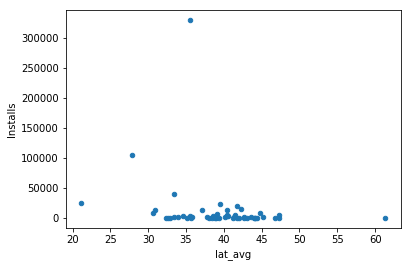

In [176]:
# As an initial test, we will plot a state's latitude against the total number of installs. The assumption is 
# that southern states in general will benefit more from solar instalations.

table.plot(x='lat_avg', y='Installs', kind='scatter')

In [177]:
# While we can see that states above 40 degrees N aren't included in the highest number of installations,
# the direct correlation is not otherwise good. (I'll be leaving out attempts to analyze the data with statistics
# here, relying instead on inspection of the charts and plots.)
# Inspecting the table indicates that there are many large states with high numbers of installations. This
# would make sense, a large state like California will simply have more room and opportunity for installs
# than smaller, New England states.

In [178]:
# We'll bring in some other data we think might be relavant to correlations of installations.
# The following data sets were taken from state ranking data found on Wikipedia. Formatting was done 
# manually through Vim editing of the csv files.

size = pd.read_csv("Files/StateLandSize.csv", usecols=[1,2]) # State size in square miles
pop = pd.read_csv("Files/StatePop.csv", usecols=[1,2])  # State population in 2016
money = pd.read_csv("Files/StatesGDP.csv", usecols=[1,2])  # State GDP in 2016
poli = pd.read_csv("Files/StatesPoli.csv") # State Democrat/Republican ranking based on 2016 election results
rain = pd.read_csv("Files/StateRain.csv")  # Average state rainfall

money.head(10)

,State,2016
0,California,2602672
1,Texas,1616801
2,New York,1487998
3,Florida,926817
4,Illinois,791608
5,Pennsylvania,724936
6,Ohio,625715
7,New Jersey,581122
8,Georgia,525360
9,North Carolina,517904


In [179]:
# Individual new frames will be merged into the main table using "State" as the matching key.

table = pd.merge(size, table, on='State')
table = pd.merge(pop, table, on='State')
table = pd.merge(rain, table, on='State')
table = pd.merge(money, table, on='State')
table = pd.merge(poli, table, on='State')
table.head(5)

,State,BlueRank,2016,Rain,Population,square_miles,lat_avg,lng_avg,Sunshine,Installs
0,Vermont,55.2,31092,42.7,625741,9249.56,44.064822,-72.850985,950.300000,131
1,Massachusetts,54.1,507913,47.7,6547629,7840.02,42.219709,-71.303393,979.224945,15331
2,Maryland,54.5,378280,44.5,5773552,9773.82,39.149358,-76.775243,1033.314976,6077
3,New York,52.9,1487998,41.8,19378102,47213.79,41.786548,-74.914970,983.899900,19979
4,Delaware,53.4,70387,45.7,897934,1953.56,39.361974,-75.534180,1037.238470,90


In [180]:
# Ranmame columns and resort by installs

table = table.rename(columns={'2016' : 'GDP', 'square_miles' : 'Size'})
table = table.sort_values('Installs', ascending=False)
table.head(5)


,State,BlueRank,GDP,Rain,Population,Size,lat_avg,lng_avg,Sunshine,Installs
6,California,50.3,2602672,22.2,37253956,155959.34,35.584029,-119.433405,1276.813141,328899
20,Florida,42.5,926817,54.5,18801310,53926.82,27.913580,-81.751371,1162.082409,104123
22,Arizona,41.4,302952,13.6,6392017,113634.57,33.345498,-111.894876,1378.221736,39553
5,Hawaii,49.8,83917,63.7,1360301,6422.62,21.135301,-157.507901,1272.311491,25414
23,Colorado,42.4,323692,15.9,5029196,103717.53,39.528334,-105.222909,1246.368033,24140


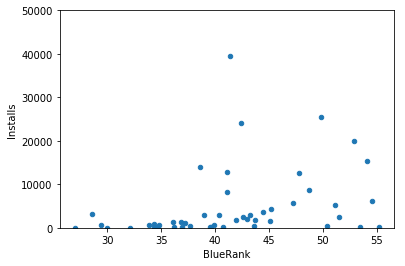

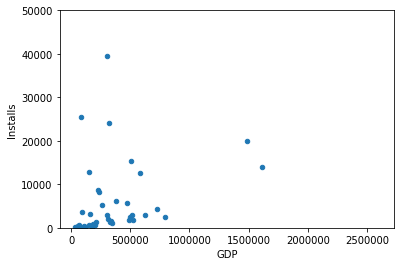

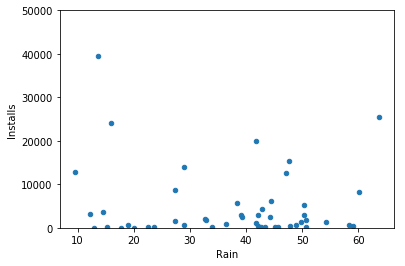

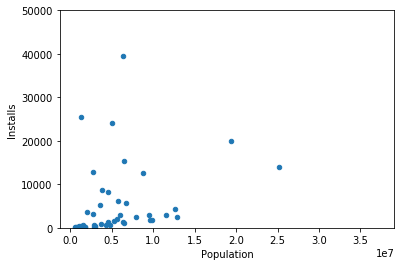

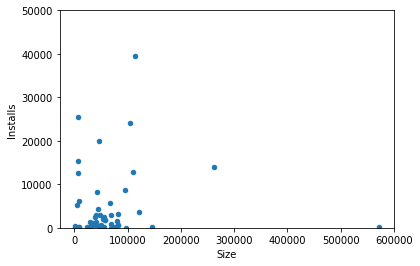

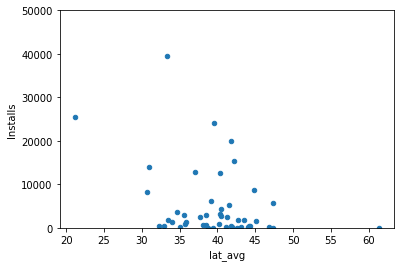

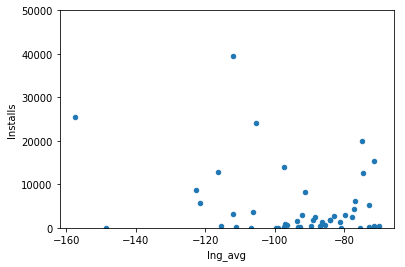

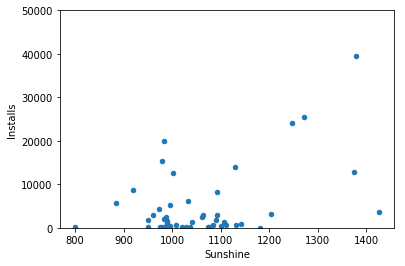

In [184]:
# Plot each factor against installs, looking for correlations
# Setting y scale to 50,000 to better see correlations for the majority of states with fewer installs

for i in ['BlueRank', 'GDP', 'Rain', 'Population', 'Size', 'lat_avg', 'lng_avg', 'Sunshine']:
    table.plot(x=i, y='Installs', kind='scatter', ylim=[0,50000])


,State,BlueRank,GDP,Rain,Population,Size,lat_avg,lng_avg,Sunshine,Installs,Factors
6,California,50.3,2602672,22.2,37253956,155959.34,35.584029,-119.433405,1276.813141,328899,306199.007982
20,Florida,42.5,926817,54.5,18801310,53926.82,27.913580,-81.751371,1162.082409,104123,35449.571368
26,Texas,38.6,1616801,28.9,25145561,261797.12,30.890491,-97.381145,1129.555954,13969,30393.400307
5,Hawaii,49.8,83917,63.7,1360301,6422.62,21.135301,-157.507901,1272.311491,25414,26238.871346
3,New York,52.9,1487998,41.8,19378102,47213.79,41.786548,-74.914970,983.899900,19979,24902.442731
22,Arizona,41.4,302952,13.6,6392017,113634.57,33.345498,-111.894876,1378.221736,39553,22300.643135
8,Illinois,51.5,791608,39.2,12830632,55583.58,41.290517,-88.449555,986.499436,2403,13757.545766
23,Colorado,42.4,323692,15.9,5029196,103717.53,39.528334,-105.222909,1246.368033,24140,12692.727315
2,Maryland,54.5,378280,44.5,5773552,9773.82,39.149358,-76.775243,1033.314976,6077,11492.167006
13,New Mexico,44.4,93297,14.6,2059179,121355.53,34.631590,-106.248681,1426.683472,3735,10199.202028


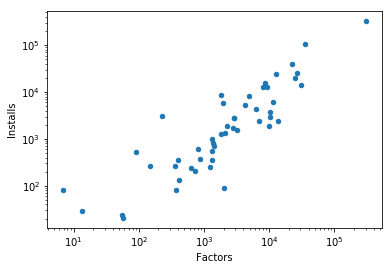

In [182]:
# Inspecting all graphs, we see that some factors show little or no correlations (longitude, latitude, rain)
# while others all show positive correlations (best-fit squares lines slope up-right.)
# We can combine the factors which show correlation and ideally generate a single plot with few outliers.
# Installs = f(Sunshine, GDP, Population, Size, BlueRank)
# We'll generate a new column of these calculated factors, and play with the coefficients and normalizations:

# Note: After several iterations, longitude and latitude were re-introduced, which helped to bring in better correlations.

# table['Factors'] = (np.log(table['Population']) * (table['GDP']) * (table['BlueRank'] - 26)**2 
#                    * ((table['Sunshine'] - 795)**2)) / 10**13
table['Factors'] = ((table['GDP']) * (table['BlueRank'] - 25)**2 * -(table['lng_avg'] - 50)
                    * ((table['Sunshine'] - 750)**2) / ( (table['lat_avg'] - 10) * 10**10))
table = table.sort_values('Factors', ascending=False)
table.plot(x='Factors', y='Installs', kind='scatter', loglog=True)
table

In [183]:
# At this point we can see a pretty clear correlation between the factors involved in "predicting" how many solar
# installations a state may have. The data might be normalized better so that there is not a 10^5 spread in the 
# results (although there is that much spread in the installation numbers, so it might be appropriate.) We used
# a log-log plot to bring in the spread, although that has an artificial tendency to make plots look more linear.

# The outliers include Texas, which factors would indicate should have many more installations that it does. Perhaps
# that state's high oil-producing economy suppresses otherwise good tendencies for solar. Outliers on the high side
# include Colorado, Washington, Oregon, and Utah. They were given factor "boosts" with good scores for western latitude
# and Democrat-leaning politics. But even that wasn't enough to explain why they have higher solar installations
# than would be predicted here. 

